In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [176]:
# konwersja z jedn. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [177]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364


In [178]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [179]:
pd.get_dummies(df)

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


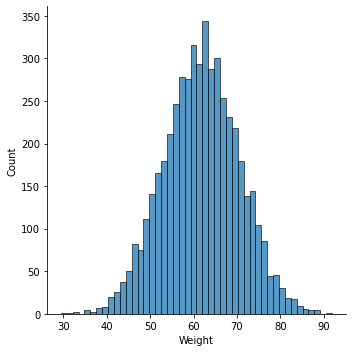

In [180]:
sns.displot(df.query(" Gender=='Female' ").Weight)

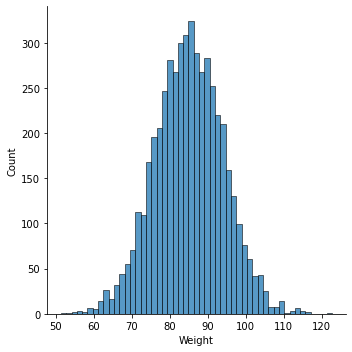

In [181]:
sns.displot(df.query(" Gender=='Male' ").Weight)

In [182]:
df = pd.get_dummies(df)
df

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


In [183]:
# usunięcie nadmiarowej kolumny
del(df["Gender_Male"])

In [184]:
# Dla Gender:
# 0 - mezczyzni
# 1 - kobiety
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.sample(n=5)

,Height,Weight,Gender
8446,162.971017,71.776831,1
8837,159.643812,60.662087,1
6861,159.148882,59.877901,1
7367,151.745390,43.606039,1
7258,159.149527,55.039763,1


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [186]:
model = LinearRegression()
model.fit(df[ ["Height","Gender"] ] , df.Weight)

LinearRegression()

In [187]:
# obliczanie predykcji dla nowej próbki danych
model.predict([ [192, 0] ])

array([102.84294991])

In [188]:
# obliczanie predykcji dla nowych próbek danych
model.predict([ [192, 0] , [188, 0], [154, 1] ])

array([102.84294991,  98.56453815,  53.38998795])

In [189]:
model.coef_ , model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [190]:
pd.DataFrame(model.coef_, ["Height","Gender"])

,0
Height,1.069603
Gender,-8.808050


In [191]:
height = 192
gender = 0 # mezczyzna
model.intercept_ + model.coef_[0]*height + model.coef_[1]*gender

102.84294990633599

In [192]:
r2_score( df.Weight, model.predict(df[ ["Height","Gender"] ]) )

0.9027481729220092

### Predykcja cen mieszkań - W-wa/Mokotów

In [193]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [194]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [195]:
df.query(" rok_budowy>2021 ")

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
182,46p8c,531400,10,2,1,49.20,2022
722,46lrK,532000,10,2,2,49.00,2022
723,46lrM,675000,10,3,1,66.00,2022
817,44G7p,990000,4,3,1,71.41,2022
1084,46ikq,543045,10,2,2,48.85,2022
1134,46hyb,369063,10,2,1,27.95,2022
1300,46fCx,531400,10,2,1,49.20,2022
1301,46fCu,367999,10,1,1,28.50,2022
1616,46b1l,657260,10,3,1,62.79,2022
1618,46b1k,528516,10,2,1,47.67,2022


<AxesSubplot:>

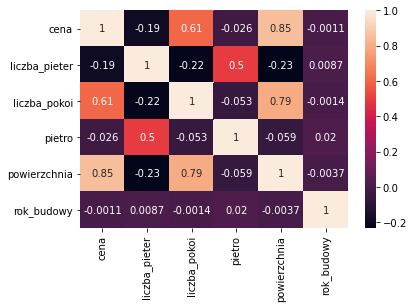

In [196]:
sns.heatmap( df.corr() , annot=True)

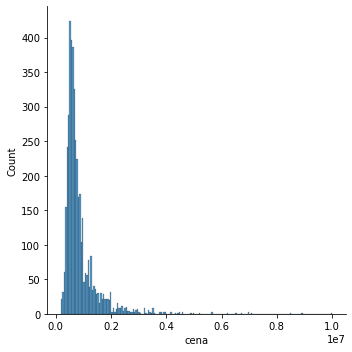

In [197]:
sns.displot(df.cena)

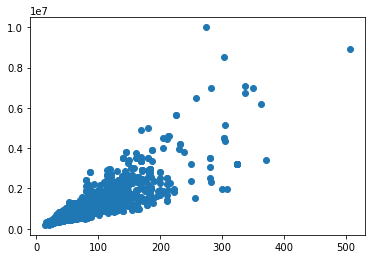

In [198]:
plt.scatter(df.powierzchnia, df.cena)

In [199]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [200]:
min_ = df.describe().loc["min","cena"] 
q3_ = df.describe().loc["75%","cena"] 
min_, q3_

(187330.0, 939900.0)

In [201]:
df1 = df[ (df.cena>=min_)&(df.cena<=q3_) ]

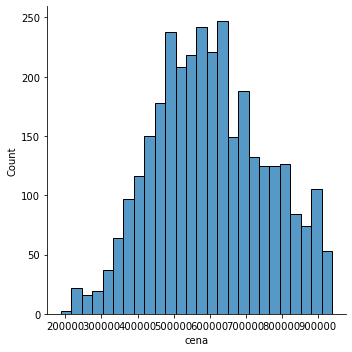

In [202]:
sns.displot(df1.cena)

In [203]:
df1.shape[0] / 5

647.2

In [204]:
df1 = df1.sample(frac=1, random_state=0)

In [205]:
df_test = df1[:650]
df_train = df1[650:]

In [206]:
df_test.shape, df_train.shape

((650, 7), (2586, 7))

In [207]:
X_train = df_train.iloc[ : , 2:]
X_test = df_test.iloc[ : , 2:]

y_train = df_train["cena"]
y_test = df_test["cena"]

In [208]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6830036031232325
TEST: -28.89216091102125


In [209]:
from sklearn.model_selection import train_test_split

In [210]:
df1.head()

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
3702,44sdF,729000,3,3,3,63.00,1989
611,46mKS,513000,4,3,1,47.40,1970
3003,45yeO,699999,10,3,0,64.00,1974
1540,45Z3U,720000,4,2,0,60.00,2000
2770,442pc,599000,3,3,2,63.84,1984


In [211]:
X = df1.iloc[: , 2: ]
y = df1.cena 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [212]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6563766469247977
TEST: 0.6995655705259888


In [213]:
pd.DataFrame( model.coef_ , X.columns)

,0
liczba_pieter,1310.183114
liczba_pokoi,-23719.951291
pietro,217.598983
powierzchnia,8640.682725
rok_budowy,-0.845425


In [214]:
# estimator na 3 cechach
X = df1[ ["liczba_pieter","liczba_pokoi","powierzchnia"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6563627627762533
TEST: 0.6995728742641243


In [215]:
# estimator na 1 cesze
X = df1[ ["powierzchnia"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6498220569942491
TEST: 0.6928654779316299


In [216]:
df1["hipoteka"] = 1
df1.head()

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy,hipoteka
3702,44sdF,729000,3,3,3,63.00,1989,1
611,46mKS,513000,4,3,1,47.40,1970,1
3003,45yeO,699999,10,3,0,64.00,1974,1
1540,45Z3U,720000,4,2,0,60.00,2000,1
2770,442pc,599000,3,3,2,63.84,1984,1


In [217]:
# estimator na 6 cechach
X = df1.iloc[:, 2:]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6563766469247978
TEST: 0.6995655705259887


### Analiza Boston House Pricing

In [233]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [219]:
ds = load_boston()

In [220]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [221]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [222]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [223]:
X = df.iloc[:, :-1 ]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7508856358979672
TEST: 0.6687594935356306


<AxesSubplot:>

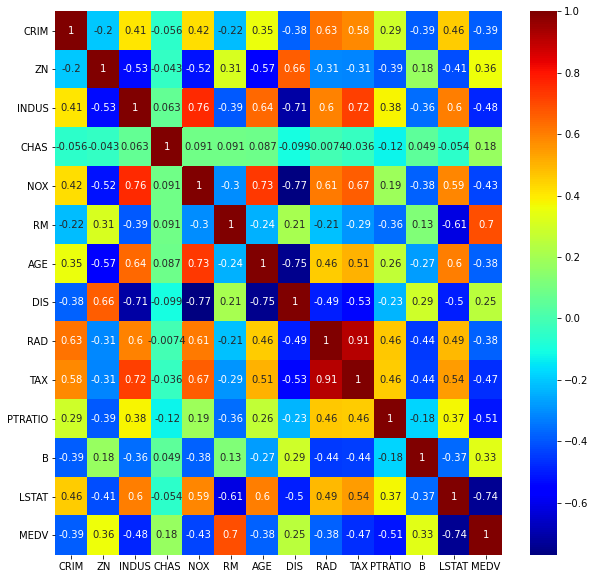

In [224]:
plt.figure(figsize=(10,10))
sns.heatmap( df.corr(), annot=True, cmap="jet" )

In [225]:
best_cols = df.corr().iloc[-1].abs().sort_values(ascending=False)[1:11].index
best_cols

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN'],
      dtype='object')

<AxesSubplot:>

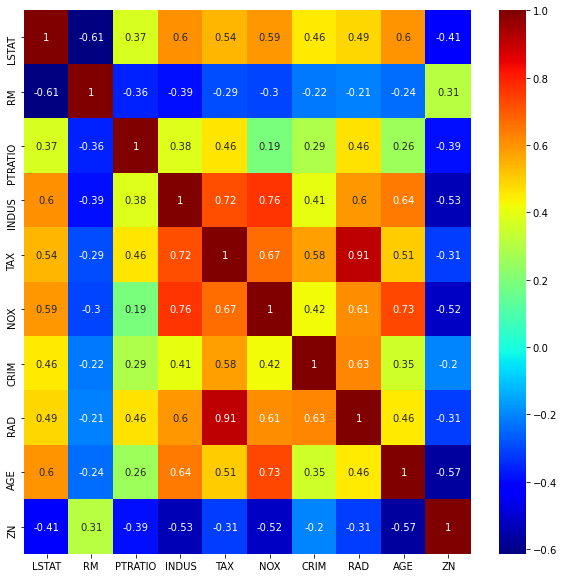

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap( df[best_cols].corr() , annot=True, cmap="jet")

In [227]:
X = df[best_cols]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7057145874002422
TEST: 0.6437021254129367


In [228]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

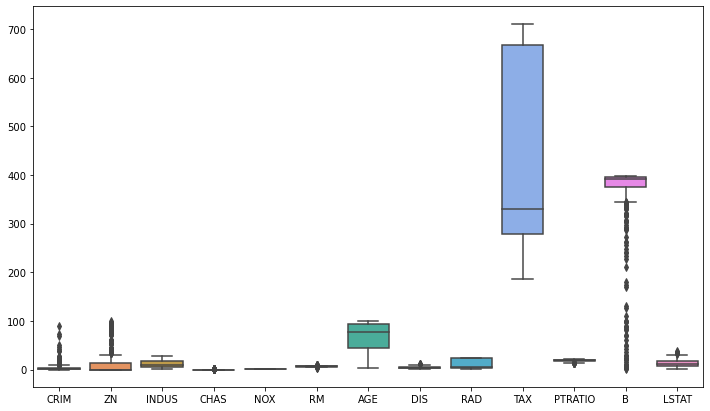

In [229]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df.iloc[:, :-1])

TRAIN: 0.7508856358979673
TEST: 0.6687594935356318


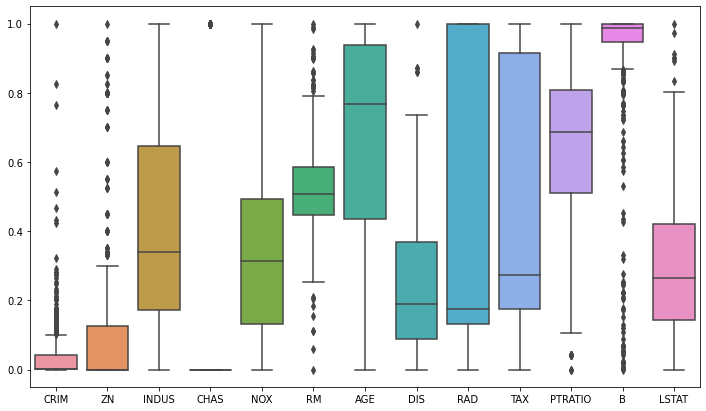

In [232]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(ds.data)

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

plt.figure(figsize=(12,7))
sns.boxplot(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7508856358979672
TEST: 0.6687594935356318


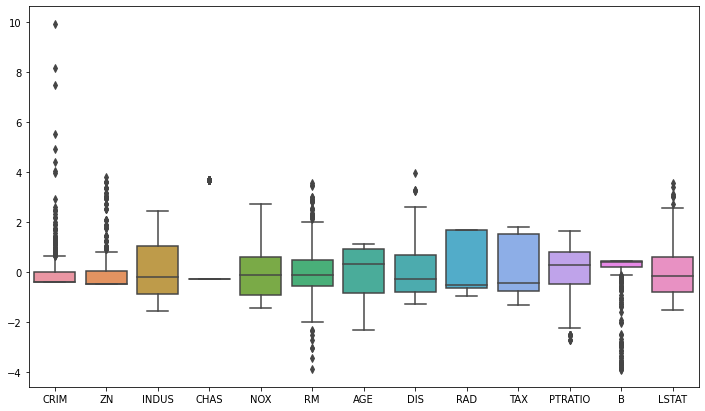

In [234]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(ds.data)

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

plt.figure(figsize=(12,7))
sns.boxplot(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7508856358979673
TEST: 0.6687594935356321


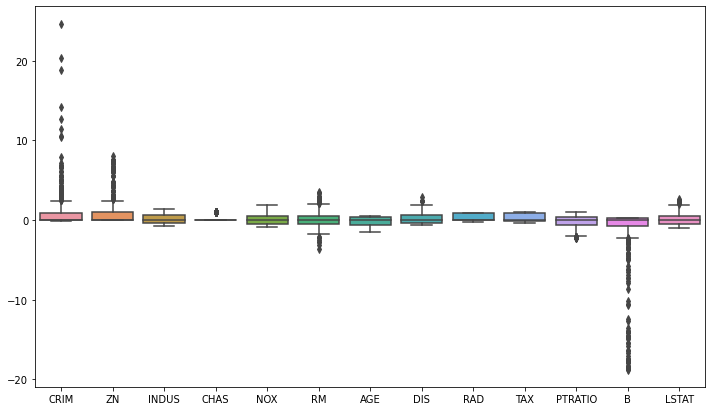

In [235]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(ds.data)

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

plt.figure(figsize=(12,7))
sns.boxplot(data=X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

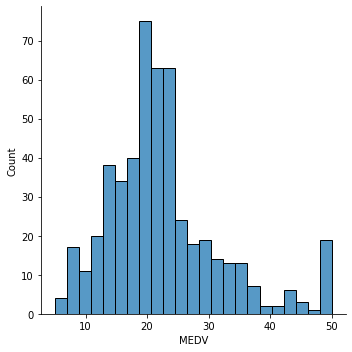

In [236]:
sns.displot(y)